In [1]:
%matplotlib inline

In [2]:
import pickle as pkl
import pandas as pd
from datetime import  datetime, timedelta
from copy import copy

from core import  do_simulation
from helpers import Params, plot_total, T, data2df, enhance_total, save_to_json, save_bundle
from const import  STATE

In [3]:
p0_time = pkl.load(open('output/p0_time.pkl', 'rb'))
lockdown_time = T('23/01/2020')

In [4]:
p0_time

datetime.datetime(2019, 11, 29, 0, 0)

In [5]:
bed_info_raw = [
    (p0_time, 3000), # 3000),
    (T('25/01/2020'), 1000), # 4000),    
    (T('31/01/2020'), 6000), # 10000),
    (T('04/02/2020'), 1000), #  11000),
    (T('07/02/2020'), 2000), # 13000)
    (T('11/02/2020'), 6000),  # 19000
    (T('17/02/2020'), 11000),  # 28000
    (T('21/02/2020'), 11000),  # 39000
]
pkl.dump(bed_info_raw, open('data/bed_info_raw.pkl', 'wb'))
# number of new beds at  some days
bed_info = [((d-p0_time).days, n) for d, n in bed_info_raw]
pkl.dump(bed_info, open('data/bed_info.pkl', 'wb'))
print(bed_info)

[(0, 3000), (57, 1000), (63, 6000), (67, 1000), (70, 2000), (74, 6000), (80, 11000), (84, 11000)]


In [6]:
params_before = pkl.load(
    open('output/params_before_lockdown.pkl', 'rb')
)

params_after = pkl.load(
    open('output/params_after_lockdown.pkl', 'rb')
)

In [7]:
days_before_ld  = (lockdown_time -  p0_time).days
days_before_ld

55

In [8]:
total_days = 360

In [9]:
params = Params(
    total_population=params_before.total_population,
    initial_num_E=params_before.initial_num_E,
    initial_num_I=params_before.initial_num_I,
    initial_num_M=params_before.initial_num_M,    
    alpha=[(0, params_before.alpha), (days_before_ld, params_after.alpha)],
    beta=[(0, params_before.beta), (days_before_ld, params_after.beta)],
    stages=[days_before_ld]
)

total, delta, increase, trans_data, stats = do_simulation(total_days, bed_info, params, p0_time=p0_time, verbose=0)

 56%|█████▌    | 200/360 [00:37<00:32,  4.90it/s]

O fraction  0.9902724634009719


In [10]:
params

total_population: 9000000
initial_num_E: 1
initial_num_I: 0
initial_num_M: 0

alpha: [(0, 3.199810675146789e-08), (55, 1.6e-08)]
beta:  [(0, 3.199810675146789e-09), (55, 1.6000000000000003e-09)]

mu_ei: 6.0

x0_pt: 10000
k_pt:  0.0001

mu_mo: 14.0

k_days: 28
        

In [11]:
stats

{'R0_by_stage': {0: (5.1403771590792005,
   2.390100335739419,
   2.6510649337996512),
  1: (6.066777404950852, 3.9164607465400274, 1.979282329945617)},
 'end_time': (201, '17/06/20'),
 'peak_time': (80, '17/02/20'),
 'when_dO_gt_dI': (81, '18/02/20'),
 'when_dO_gt_dE': (80, '17/02/20'),
 'turning_time_real': (88, '25/02/20'),
 'turning_time_theory': (91, '28/02/20')}

In [12]:
p0_time + timedelta(days=total_days)

datetime.datetime(2020, 11, 23, 0, 0)

/home/cloud-user/code/covid-19/helpers.py:272: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['index'] = df.index
/home/cloud-user/code/covid-19/helpers.py:273: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['value'] = subdf[state].copy()
/home/cloud-user/code/covid-19/helpers.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

['29/11/19' '09/02/20' '21/04/20' '02/07/20' '12/09/20' '23/11/20']


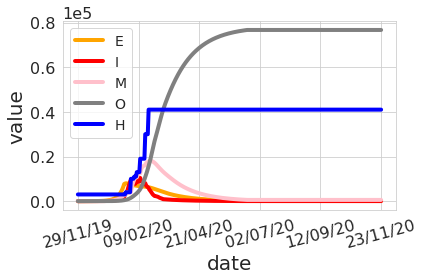

In [13]:
from helpers import plot_total
fig, ax = plot_total(total, p0_time, total_days)
fig.savefig('figs/start2end.pdf')

In [17]:
save_bundle([total, delta, increase, trans_data], p0_time, total_days, 'output/tbl/start2end')

In [18]:
path = 'output/tbl/start2end/stats.txt'
save_to_json(stats, path)